In [ ]:
#https://levelup.gitconnected.com/painless-classification-model-using-rnn-b90cb0982543

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from nltk import word_tokenize

df = pd.read_csv('/content/drive/MyDrive/MSc DS_NLP/judge-1377884607_tweet_product_company.csv',encoding='ISO-8859-1') 
df = df.rename(columns={"is_there_an_emotion_directed_at_a_brand_or_product": "emotion"})
df = df.dropna(subset=['emotion', 'tweet_text'])

data = df['tweet_text'].map(word_tokenize).values
total_vocabulary = set(word.lower() for tweet in data for word in tweet)  # set created from nested comprehension 
print('There are {} unique words in the dataset.'.format(len(total_vocabulary)))
print('There are {} unique tweets in the dataset.'.format(len(data)))


df.head()

There are 10796 unique words in the dataset.
There are 9092 unique tweets in the dataset.


,tweet_text,emotion_in_tweet_is_directed_at,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [ ]:
def remove_at(text):
  spl_pattern=r'@\w+'
  without_spl=re.sub(pattern=spl_pattern,repl=" ",string=text)
  return without_spl
df['tweet_text']=df['tweet_text'].apply(remove_at)

In [ ]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,emotion
0,. I have a 3G iPhone. After 3 hrs tweeting at...,iPhone,Negative emotion
1,Know about ? Awesome iPad/iPhone app that ...,iPad or iPhone App,Positive emotion
2,Can not wait for #iPad 2 also. They should s...,iPad,Positive emotion
3,I hope this year's festival isn't as crashy ...,iPad or iPhone App,Negative emotion
4,great stuff on Fri #SXSW: Marissa Mayer (Goo...,Google,Positive emotion


In [ ]:
import re
def remove_special(text):
  spl_pattern=r'[^a-zA-Z]'
  without_spl=re.sub(pattern=spl_pattern,repl=" ",string=text)
  return without_spl

df['tweet_text']=df['tweet_text'].apply(remove_special)

In [ ]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,emotion
0,I have a G iPhone After hrs tweeting at...,iPhone,Negative emotion
1,Know about Awesome iPad iPhone app that ...,iPad or iPhone App,Positive emotion
2,Can not wait for iPad also They should s...,iPad,Positive emotion
3,I hope this year s festival isn t as crashy ...,iPad or iPhone App,Negative emotion
4,great stuff on Fri SXSW Marissa Mayer Goo...,Google,Positive emotion


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

# set the emotion/sentiment as our target
target = df['emotion']

# use one hot encoding since our target is categorical
y = pd.get_dummies(target).values

# use keras to create a Tokenizer object
tokenizer = text.Tokenizer(num_words=20000)  # limit to the num_words most important ones
tokenizer.fit_on_texts(list(df['tweet_text']))
tokenized_texts = tokenizer.texts_to_sequences(df['tweet_text'])
X = sequence.pad_sequences(tokenized_texts, maxlen=100)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create my NN model
model = Sequential()

embedding_size = 128
model.add(Embedding(len(total_vocabulary), embedding_size))
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # use 4 because we have 4 categories

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary() # check the shape

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         1381888   
                                                                 
 lstm_2 (LSTM)               (None, None, 25)          15400     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 25)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_6 (Dropout)         (None, 25)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                1300      
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                      

In [ ]:
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
205/205 [==============================] - 15s 75ms/step - loss: 0.3400 - accuracy: 0.8688 - val_loss: 2.3139 - val_accuracy: 0.6401
Epoch 2/10
205/205 [==============================] - 15s 72ms/step - loss: 0.3224 - accuracy: 0.8799 - val_loss: 2.4017 - val_accuracy: 0.6401
Epoch 3/10
205/205 [==============================] - 13s 64ms/step - loss: 0.3045 - accuracy: 0.8842 - val_loss: 2.4110 - val_accuracy: 0.6360
Epoch 4/10
205/205 [==============================] - 14s 68ms/step - loss: 0.2921 - accuracy: 0.8885 - val_loss: 2.8728 - val_accuracy: 0.6442
Epoch 5/10
205/205 [==============================] - 12s 59ms/step - loss: 0.2827 - accuracy: 0.8932 - val_loss: 2.8706 - val_accuracy: 0.6470
Epoch 6/10
205/205 [==============================] - 12s 59ms/step - loss: 0.2650 - accuracy: 0.8981 - val_loss: 3.0202 - val_accuracy: 0.6470
Epoch 7/10
205/205 [==============================] - 12s 57ms/step - loss: 0.2512 - accuracy: 0.8978 - val_loss: 2.8639 - val_accuracy:

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test) # get our predictions
y_pred = (y_pred > 0.5) 
acc = accuracy_score(y_test, y_pred) 
print('Overall accuracy of RNN: {:.3f}'.format(acc))

Overall accuracy of RNN: 0.622


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

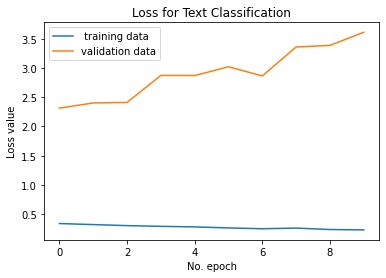

In [ ]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

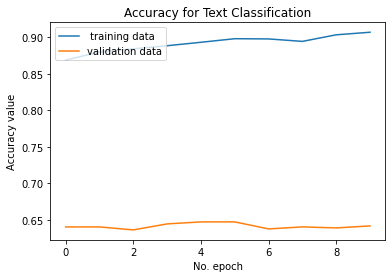

In [ ]:
plt.plot(history.history['accuracy'], label=' training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('Accuracy for Text Classification')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# try with this dataset
#https://www.kaggle.com/uciml/news-aggregator-dataset